# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [234]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [14]:
# data.drop(['is_patient'])
# data['is_patient'].unique()

array([1, 2], dtype=int64)

Columns:

*  Age of the patient = age
*  Gender of the patient = gender
*  Total Bilirubin = tot_bilirubin
*  Direct Bilirubin = direct_bilirubin
*  Alkaline Phosphotase = alkphos
*  Alamine Aminotransferase = sgpt
*  Aspartate Aminotransferase = sgot
*  Total Protiens = tot_proteins
*  Albumin = albumin
*  Albumin and Globulin Ratio = ag_ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease) = is_patient


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


При работе с признаком Alkaline Phosphotase = alkphos обратить внимание на вылеты. Удаляем их.

In [142]:
data_1 = data.dropna()

In [143]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
age                 579 non-null int64
gender              579 non-null object
tot_bilirubin       579 non-null float64
direct_bilirubin    579 non-null float64
tot_proteins        579 non-null int64
albumin             579 non-null int64
ag_ratio            579 non-null int64
sgpt                579 non-null float64
sgot                579 non-null float64
alkphos             579 non-null float64
is_patient          579 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


**Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.**

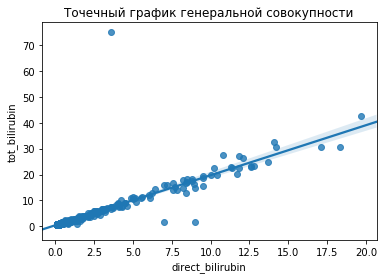

In [144]:
sns.regplot(x= data_1['direct_bilirubin'], y=data_1['tot_bilirubin'],data=data_1, fit_reg=True)
plt.xlabel('direct_bilirubin')
plt.ylabel('tot_bilirubin')
plt.title('Точечный график генеральной совокупности')
plt.show()

По графику видно, что имеем линейную зависимость. Видим один однозначный вылет, который негативно повлияет на поиск функции регрессии. Удалим вылет.

In [162]:
data_2 = data_1[data_1['tot_bilirubin'] < 60] 
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 582
Data columns (total 11 columns):
age                 578 non-null int64
gender              578 non-null object
tot_bilirubin       578 non-null float64
direct_bilirubin    578 non-null float64
tot_proteins        578 non-null int64
albumin             578 non-null int64
ag_ratio            578 non-null int64
sgpt                578 non-null float64
sgot                578 non-null float64
alkphos             578 non-null float64
is_patient          578 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 54.2+ KB


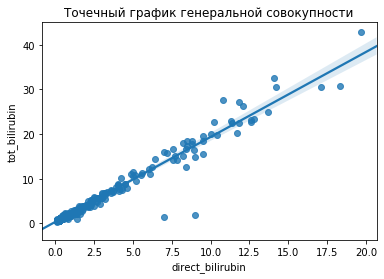

In [163]:
sns.regplot(x= data_2['direct_bilirubin'], y=data_2['tot_bilirubin'],data=data_2, fit_reg=True)
plt.xlabel('direct_bilirubin')
plt.ylabel('tot_bilirubin')
plt.title('Точечный график генеральной совокупности')
plt.show()

Ищем функцию одномерной линейной регрессии y=k*x + b

In [164]:
from sklearn.linear_model import LinearRegression
direct_bilirubin = data_2['direct_bilirubin']
tot_bilirubin = data_2['tot_bilirubin']
model = LinearRegression()
result = model.fit(np.array(direct_bilirubin).reshape(-1,1), tot_bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.355738886281062
slope: [1.90247583]


Коэффицент и константа линейной функции найдены:

y=k*x + b

y - tot_bilirubin

x - direct_bilirubin

k = 1.90247583

b = 0.355738886281062

Построим эту прямую на графике

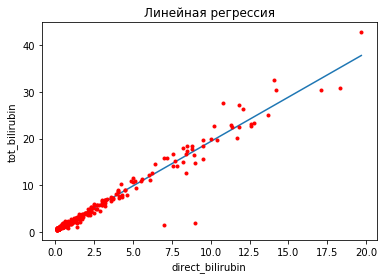

In [165]:
plt.xlabel('direct_bilirubin')
plt.ylabel('tot_bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(direct_bilirubin), max(direct_bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(direct_bilirubin, tot_bilirubin, 'r.')
plt.show()

In [166]:
# предскажем значения строк с индексами 3, 15, 345. 
# Выведем их и посмотрим корректность предсказания показателя tot_bilirubin по значению direct_bilirubin
data_2.loc[3]

age                   58
gender              Male
tot_bilirubin          1
direct_bilirubin     0.4
tot_proteins         182
albumin               14
ag_ratio              20
sgpt                 6.8
sgot                 3.4
alkphos                1
is_patient             1
Name: 3, dtype: object

In [167]:
model.predict(np.array([0.4]).reshape(-1, 1))

array([1.11672922])

In [168]:
data.loc[15]

age                   25
gender              Male
tot_bilirubin        0.6
direct_bilirubin     0.1
tot_proteins         183
albumin               91
ag_ratio              53
sgpt                 5.5
sgot                 2.3
alkphos              0.7
is_patient             2
Name: 15, dtype: object

In [169]:
model.predict(np.array([0.1]).reshape(-1, 1))

array([0.54598647])

In [170]:
data.loc[345]

age                   60
gender              Male
tot_bilirubin        2.9
direct_bilirubin     1.3
tot_proteins         230
albumin               32
ag_ratio              44
sgpt                 5.6
sgot                   2
alkphos              0.5
is_patient             1
Name: 345, dtype: object

In [171]:
model.predict(np.array([1.3]).reshape(-1, 1))

array([2.82895746])

Как видим предсказанные с помощью регрессионной модели значения tot_bilirubin примерно соотвествуют действительности.

**Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.**

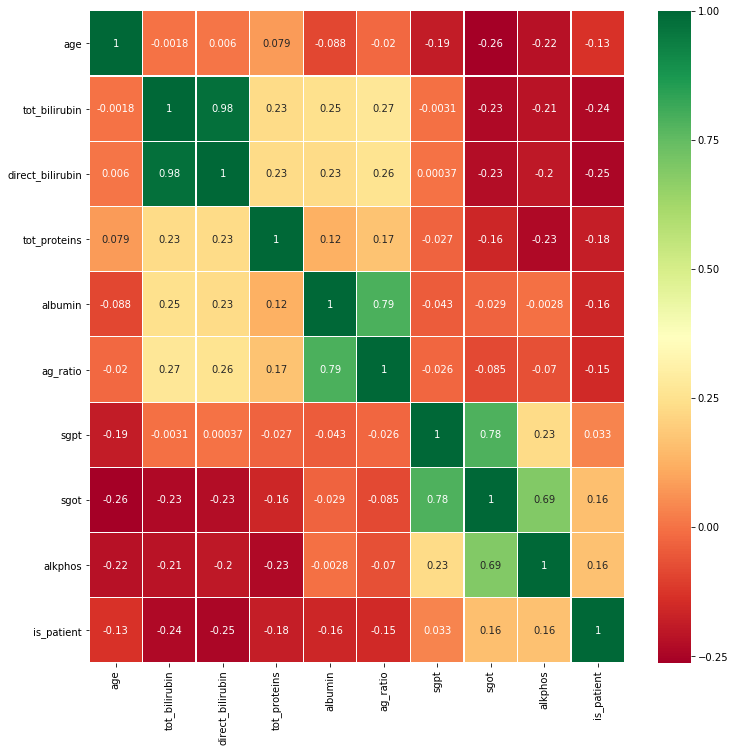

In [172]:
sns.heatmap(data_2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Два наиболее сильно коррелирующиъх атрибута с таргетом - это direct_bilirubin и tot_bilirubin. Но они сильно коррелируют между собой, поэтому возьмем один из них  и еще один атрибут, сильнее других куоррелирующий с таргетом, но слабо коррелирующий с перым выбранным атрибутом.
Возьмем два параметра - age и direct_bilirubin. 

In [173]:
age = data_2['age']
direct_bilirubin = data_2['direct_bilirubin']
is_patient = data_2['is_patient']
x = np.vstack([np.array(age), np.array(direct_bilirubin)]).T
print('x - это двумерная матрица, где колонки - это age и direct_bilirubin: ')
print(x[:5])
y = np.array(is_patient)
model_1 = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это age и direct_bilirubin: 
[[65.   0.1]
 [62.   5.5]
 [62.   4.1]
 [58.   0.4]
 [72.   2. ]]


In [174]:
print('intercept:', model_1.intercept_)

print('slope:', model_1.coef_)

intercept: 1.507474192100404
slope: [-0.00365136 -0.0392859 ]


коэффициенты k для параметров отрицательные, имеем обратную зависимость. Наличие болезни силнее зависит от direct_bilirubin, чем от age, судя по величине коэффициентов. На паирплоте это видно - корреляция у age и таргета слабее, чем у direct_bilirubin и таргета

Предскажем значение is_patient для строк датасета с индексами 243, 500, 12

In [179]:
data_2.loc[243]

age                     28
gender              Female
tot_bilirubin          0.9
direct_bilirubin       0.2
tot_proteins           316
albumin                 25
ag_ratio                23
sgpt                   8.5
sgot                   5.5
alkphos                1.8
is_patient               1
Name: 243, dtype: object

In [176]:
model_1.predict(x[243:244])

array([0.95307634])

In [180]:
data_2.loc[500]

age                   70
gender              Male
tot_bilirubin        2.7
direct_bilirubin     1.2
tot_proteins         365
albumin               62
ag_ratio              55
sgpt                   6
sgot                 2.4
alkphos              0.6
is_patient             1
Name: 500, dtype: object

In [178]:
model_1.predict(x[500:501])

array([0.83669954])

In [181]:
data_2.loc[12]

age                   64
gender              Male
tot_bilirubin        0.9
direct_bilirubin     0.3
tot_proteins         310
albumin               61
ag_ratio              58
sgpt                   7
sgot                 3.4
alkphos              0.9
is_patient             2
Name: 12, dtype: object

In [182]:
model_1.predict(x[12:13])

array([1.2620014])

In [183]:
model_1.predict(x[0:25])

array([1.26620722, 1.06501746, 1.12001771, 1.27998096, 1.16600449,
       1.31201151, 1.40468166, 1.38979899, 1.43361531, 1.29879222,
       1.29541809, 1.19350462, 1.2620014 , 1.22155921, 1.27688406,
       1.41226161, 1.3372938 , 1.36733637, 1.34963403, 1.34963403,
       1.28196895, 1.27018318, 1.1632322 , 1.3221339 , 1.26958135])

In [184]:
list(data_2['is_patient'].loc[0:25])

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1]

Предсказания линейной модели некорректны. Это связано с тем, что выбранные признаки слабо коррелируют (0,25 и 0,13) с таргетным показателем болезни.

**Посчитать квартили для всех колонок.**

In [185]:
data_2.quantile([.10, .25, .50, .75], axis = 0) 

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0.10,23.0,0.7,0.1,150.00,18.0,19.0,5.1,2.0,0.544,1.0
0.25,33.0,0.8,0.2,175.25,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.00,35.0,42.0,6.6,3.1,0.940,1.0
0.75,58.0,2.6,1.3,298.00,61.0,87.0,7.2,3.8,1.100,2.0


**Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?**

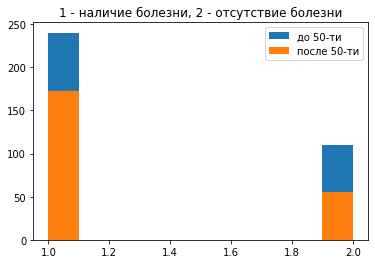

In [221]:
not_old = data_2[data_2['age']<50]['is_patient']
old = data_2[data_2['age']>=50]['is_patient']
plt.hist(not_old)
plt.hist(old)

plt.title('1 - наличие болезни, 2 - отсутствие болезни')
plt.legend(['до 50-ти', 'после 50-ти'])
plt.show()

In [199]:
print("Среднее значение выборки до 50 и после 50:", not_old.mean(), old.mean())

Среднее значение выборки до 50 и после 50: 1.2412280701754386 1.3142857142857143


In [200]:
print("Q2 квантиль ряда до 50-ти: ", np.quantile(not_old, .50)) 

Q2 квантиль ряда :  1.0


In [201]:
print("Q2 квантиль ряда после 50-ти: ", np.quantile(old, .50)) 

Q2 квантиль ряда после 50-ти:  1.0


Согласно полдученным данным анализа выборки можно сделать вывод, что количество неболеющих людей вне зависимости от возраста больше болеющих. Болезнь чуть чаще присутствует у людей старше 50-ти.


**Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?**

In [208]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 582
Data columns (total 11 columns):
age                 578 non-null int64
gender              578 non-null object
tot_bilirubin       578 non-null float64
direct_bilirubin    578 non-null float64
tot_proteins        578 non-null int64
albumin             578 non-null int64
ag_ratio            578 non-null int64
sgpt                578 non-null float64
sgot                578 non-null float64
alkphos             578 non-null float64
is_patient          578 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 74.2+ KB


В этом примере ген.совокупность - все сдавшие анализы люди (578 чел). Выборка - больные люди (tot_bil_ill)

In [226]:
tot_bil_ill = data_2[data_2['is_patient'] == 1]['tot_bilirubin']

In [227]:
stats.ttest_1samp(tot_bil_ill, data['tot_bilirubin'].mean())

Ttest_1sampResult(statistic=2.306151528575727, pvalue=0.02159779304482646)

T-значение 2,3, p-value равно 0,02, это меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между показателем Тотал билирубин у больных людей и у людей в целом.

**Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?**

In [222]:
tot_bil_not_ill = data_2[data_2['is_patient'] == 1]['tot_bilirubin']

In [237]:
# расчитаем двувыборочный t-критерий
stats.ttest_ind(tot_bil_ill, tot_bil_not_ill)

Ttest_indResult(statistic=5.845534565840006, pvalue=8.459792145983823e-09)

T-значение 5,84, p-value практически равно 0, это много меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что есть статистическое различие между показателем Тотал билирубин у больных людей  и небольных людей. Выборки НЕ схожи

**Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).**

In [235]:
is_patient_1 = data_2[data_2['age']<30]['is_patient']
is_patient_30 = data_2[(data_2['age']>=30) & (data_2['age']<55)]['is_patient']
is_patient_55 = data_2[data_2['age']>=55]['is_patient']

In [238]:
# используем множественный тест ANOVA
stats.f_oneway(is_patient_1, is_patient_30, is_patient_55)

F_onewayResult(statistic=8.836323932344097, pvalue=0.00016604506373050896)

T-значение 5,84, p-value практически равно 0, это много меньше стандартной альфа ошибки 0.05.
Нулевую гипотезу не принимаем. Выборки различаются.

Вопросы задавать на почту yustiks@gmail.com